In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as col
from scipy.stats import linregress
from skimage.util.shape import view_as_blocks
from matplotlib import cm
import itertools
import numpy as np
import math
import random
colors = ["#0F0C21", "#F7FF00","#00B6FF"]
cmap1 = col.LinearSegmentedColormap.from_list("mycmap", colors)

## Problema 15

In [2]:
N=64
M=-np.ones((N,N),int) #-1 es nada, 0 es amarillo, 1 es celeste

In [3]:
def Plot(Ma): #plotea la matriz
    plt.style.use('default')
    plt.figure(figsize = (8,8))
    plt.imshow(Ma,cmap=cmap1,vmin=-1,vmax=1 ,interpolation='nearest')
    plt.show() 

def GetNumbers(A,D,tol,N): #crea el array Nk
    if ((N & (N-1) == 0) and N != 0):
        s=int(math.log2(N//2))
        if (2**(s*D)<A) and (N*N*2**(s*(D-2))>A):
            Check=True
            while Check:
                Nu=[int(np.random.poisson(lam=A*2**(-i*D))) for i in range(s+1)]
                Nu[0]=A
                if (Nu[s]>1) and (Nu[s]<=4):
                    Check=False
                    NNU=[-math.log2(Nu[i]+(Nu[i]==0)) for i in range(len(Nu))]
                    Stats=linregress(np.linspace(0,s,s+1), NNU)
                    if abs(D-Stats[0])>tol:
                        Check=True
                else:
                    Check=True
                for i in range(s):
                    if (Nu[i]<Nu[i+1]) or (Nu[i]>=4*Nu[i+1]):
                        Check=True
            return Nu,Stats[0]

        else:
            raise Exception("No se puede encontrar condición inicial para esa Área y Dimensión")
    else:
        raise Exception("El tamaño debe ser potencia de 2")
def MinMax(D,N): #devuelve Amin y Amax
    s=int(math.log2(N//2))
    print([2**(s*D),N*N*2**(s*(D-2))])
def Ocuppation(Ma,k,N): #Básicamente devuelve la cantidad de cajas ocupadas (con cajas de largo k)
    Lar=N//k
    Cant=N//(2**k)
    B = view_as_blocks(Ma, block_shape=(Cant, Cant))
    Ocup = [np.unique(B[i][j]) for i,j in itertools.product(range(len(B)), range(len(B)))]
    O = 0
    for i in range(len(Ocup)):
        if (not np.all(Ocup[i])):
            O=O+1
    return O
def Structurize1(Ma,A,NuA,N): #crea el patrón dada un área y un vector Nk
    tries=1
    fila=0
    s=len(NuA)
    posibA = [np.array([x, y]) for x in range(N) for y in range(N)]
    while (fila<A):
        ij=posibA.pop(random.randrange(len(posibA)-1))
        i=ij[0]
        j=ij[1]
        prev=Ma[i][j]
        if (prev!=0):
            Ma[i][j]=0
            che=[Ocuppation(Ma,1+k,N)>NuA[s-k-1] for k in range(s-1)]
            if np.any(che):
                Ma[i][j]=prev
            else:
                fila=fila+1
        if (len(posibA)<5):
            for i in range(N):
                for j in range(N):
                    Ma[i][j]=-1
            fila=0
            posibA = [np.array([x, y]) for x in range(N) for y in range(N)]
            tries=tries+1
    return tries
def Structurize2(Ma,A,B,NuA,NuB,N): #crea el patrón doble dadas dos áreas y dos vectores Nk
    tries=1
    fila=0
    filb=0
    s=len(NuA)
    posibA = [np.array([x, y]) for x in range(N) for y in range(N)]
    posibB = [np.array([x, y]) for x in range(N) for y in range(N)]
    while (fila!=A or filb!=B):
        if (fila<A):
            ij=posibA.pop(random.randrange(len(posibA)-1))
            i=ij[0]
            j=ij[1]
            prev=Ma[i][j]
            if (prev==-1):
                Ma[i][j]=0
                che=[Ocuppation(Ma,1+k,N)>NuA[s-k-1] for k in range(s-1)]
                if np.any(che):
                    Ma[i][j]=prev
                else:
                    fila=fila+1
        if (filb<B):
            ij=posibB.pop(random.randrange(len(posibB)-1))
            i=ij[0]
            j=ij[1]
            prev=Ma[i][j]
            if (prev==-1):
                Ma[i][j]=1
                che=[Ocuppation(Ma-1,1+k,N)>NuB[s-k-1] for k in range(s-1)]
                if np.any(che):
                    Ma[i][j]=prev
                else:
                    filb=filb+1
        if (len(posibA)<5) or (len(posibB)<5):
            for i in range(N):
                for j in range(N):
                    Ma[i][j]=-1
            fila=0
            filb=0
            posibA = [np.array([x, y]) for x in range(N) for y in range(N)]
            posibB = [np.array([x, y]) for x in range(N) for y in range(N)]
            tries=tries+1
    return tries

def Count2(Ma): #cuenta celdas
    Celestes=0
    Amarillos=0
    Apaticos=0
    for i in range(len(Ma)):
        for j in range(len(Ma)):
            if Ma[i,j]!=-1:
                if Ma[i,j]==0:
                    Amarillos+=1
                if Ma[i,j]==1:
                    Celestes+=1
            else:
                Apaticos+=1
    print("Cel=",Celestes,"Ama=",Amarillos,"Apatics=",Apaticos,"Counted=",Celestes+Amarillos+Apaticos,"L*L=",len(Ma)*len(Ma))

In [5]:
MinMax(1.55,N) #propongo dim=1.55
NuA,dim = GetNumbers(614,1.55,0.02,N)  #con area 614=N*N*0.15 y a lo sumo 0.02 de error

[215.2694823049509, 861.0779292198037]


In [6]:
NuA #encontramos estos números Nk,

[614, 198, 66, 25, 7, 3]

In [7]:
dim # que tienen dimensión:

1.5500629927684244

In [8]:
%%time
M=-np.ones((N,N),int)
tries = Structurize1(M,NuA[0],NuA,N) #esto crea el patron
tries

CPU times: total: 39.5 s
Wall time: 39.6 s


1

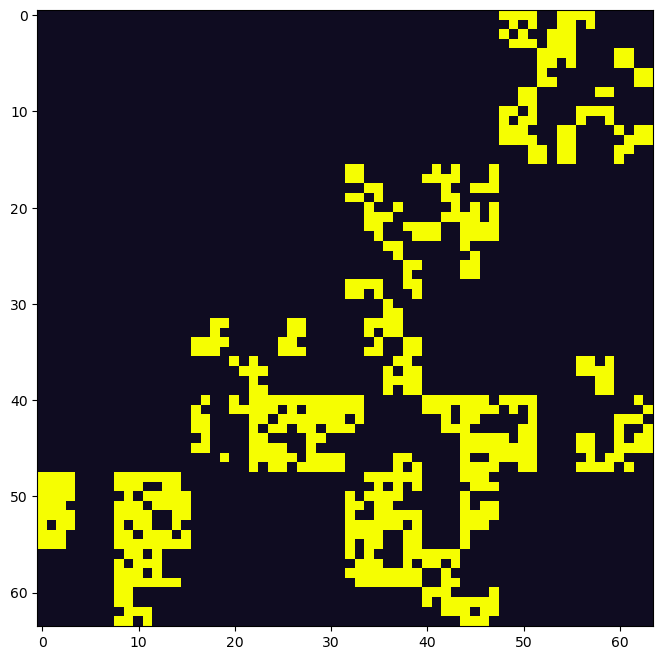

In [9]:
Plot(M) #ploteo

In [10]:
#midamos que esté bien
Nk=[Ocuppation(M,7-i,N) for i in range(1,7)]
print(Nk) #reproduce el Nk que le pedí exactamente, entonces sé que tiene la dimensión que requería
Count2(M) #el área tamien debería dar:

[614, 198, 66, 25, 7, 3]
Cel= 0 Ama= 614 Apatics= 3482 Counted= 4096 L*L= 4096


## Problema 22

In [11]:
MinMax(1.65,N)
NuB,dim = GetNumbers(614,1.65,0.02,N) #creo los Nk para el celeste
dim #con esta dim

[304.4370214406966, 1217.748085762786]


1.6403650425603054

In [12]:
NuB #estos son los numeros

[614, 186, 60, 16, 7, 2]

In [13]:
%%time
M=-np.ones((N,N),int)
tries = Structurize2(M,NuA[0],NuB[0],NuA,NuB,N) #creo el patron doble
tries

CPU times: total: 1min 17s
Wall time: 1min 17s


1

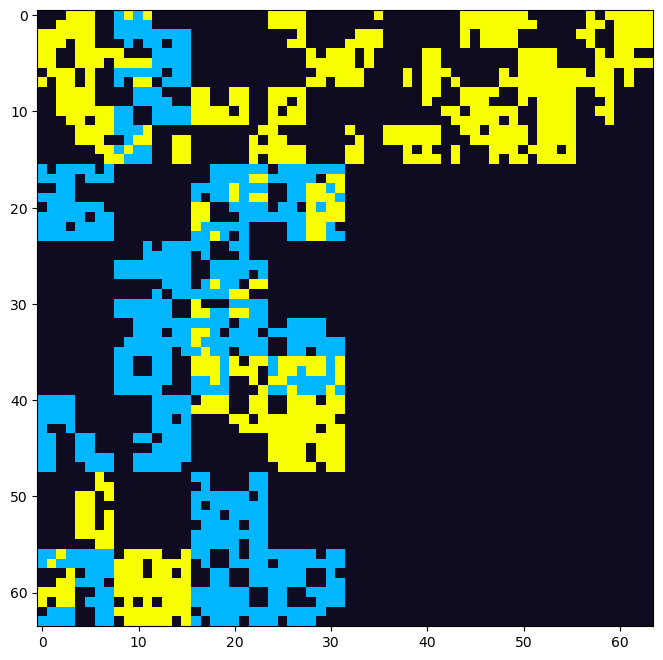

In [14]:
Plot(M) #plot

In [15]:
Count2(M) #midamos

Cel= 614 Ama= 614 Apatics= 2868 Counted= 4096 L*L= 4096


In [16]:
NkAma=[Ocuppation(M,7-i,N) for i in range(1,7)] #amarillo
print(NkAma) #reproduce el Nk que le pedí exactamente, entonces sé que tiene la dimensión que requería

[614, 198, 66, 25, 7, 3]


In [17]:
NkCel=[Ocuppation(M-1,7-i,N) for i in range(1,7)] #celeste
print(NkCel) #reproduce el Nk que le pedí exactamente, entonces sé que tiene la dimensión que requería

[614, 186, 60, 16, 7, 2]
